In [2]:
from tqdm import tqdm
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
list_path=os.listdir(r"krungsri")
list_path=["krungsri/"+i for i in list_path]
list_path

['krungsri/LINE_ALBUM_slip_230227_302.jpg',
 'krungsri/LINE_ALBUM_slip_230227_33.jpg',
 'krungsri/LINE_ALBUM_slip_230227_376.jpg',
 'krungsri/LINE_ALBUM_slip_230227_38.jpg',
 'krungsri/LINE_ALBUM_slip_230227_386.jpg',
 'krungsri/LINE_ALBUM_slip_230227_391.jpg',
 'krungsri/LINE_ALBUM_slip_230227_420.jpg',
 'krungsri/LINE_ALBUM_slip_230227_80.jpg',
 'krungsri/LINE_ALBUM_slip_230227_87.jpg']

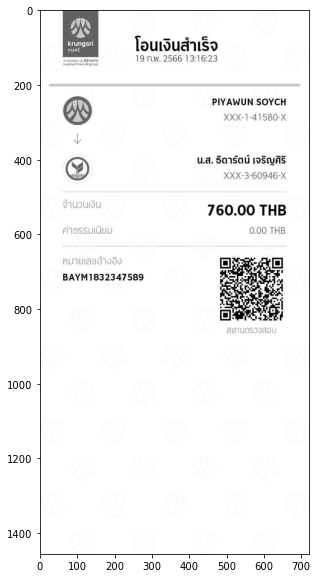

In [14]:
img = cv2.imread(list_path[0], 0)

# Apply Otsu's thresholding to the image
# ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the thresholded image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()

In [3]:
img = cv2.imread(list_path[0])

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize the OCR reader
reader = easyocr.Reader(['en','th'])

# Perform OCR on the image
ls = reader.readtext(gray, detail=0, paragraph=False)
ls

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['krungsri',
 '[ouluaniSv',
 'Fenibri',
 'HMFG',
 '19 nW. 2566 13.16.23',
 'glouai (nbticiai 9 OuH',
 'PIYAWUN SOYCH',
 'XXX-1-41580-X',
 'u.a: sanSau [@Squns',
 '',
 'XXX-3-60946-X',
 'jujunu',
 '760.00 THB',
 'AJSSSUIC:U',
 '0.00 THB',
 'Kunjiaujwov',
 'BAYM1832347589',
 '',
 '',
 'dilnucisJvaju',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [17]:
#Test the bank slip logical
list_path=os.listdir(r"krungsri")
list_path=["krungsri/"+i for i in list_path]
list_path


 # Length of the pattern to match
check_list = []
img_list = []
for i in tqdm(range(0,9)):
    img = cv2.imread(list_path[i])

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize the OCR reader
    reader = easyocr.Reader(['en','th'])

    ls = reader.readtext(gray, detail=0, paragraph=False)

    if 'ungsr' in ls[0] and (sum(1 for w in ls if 'baym' in w.lower()) >= 1 or sum(1 for w in ls if 'baxm' in w.lower()) >= 1):
        check_list.append("1")

    else:
        check_list.append("0")
    img_list.append(ls)



100%|██████████| 9/9 [04:57<00:00, 33.10s/it]


In [18]:
# img_list[0]
check_list
# len('012045212258790754')

['1', '1', '1', '1', '1', '1', '1', '1', '1']

In [19]:
#Check with all bank slip
Bank_list = ['baac','bbk','kbank','krungsri','krungthai','memo','scb','ttb']

for i in Bank_list:
    list_path = os.listdir(i)
    list_path = [os.path.join(i, j) for j in list_path]
    reader = easyocr.Reader(['en','th'])

    check_list = []
    img_list = []

    for k in tqdm(range(0,7)):
        img = cv2.imread(list_path[k])
        if img is not None:  # check if image was loaded correctly
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ls = reader.readtext(gray, detail=0, paragraph=False)
            if 'ungsr' in ls[0] and (sum(1 for w in ls if 'baym' in w.lower()) >= 1 or sum(1 for w in ls if 'baxm' in w.lower()) >= 1):
                check_list.append("1")
            else:
                check_list.append("0")
            img_list.append(ls)
        else:
            print(f"Error loading image: {list_path[k]}")
    print(f'check_list_{i}' , check_list)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 7/7 [00:40<00:00,  5.83s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_baac ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:05<00:00,  9.42s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_bbk ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [00:52<00:00,  7.53s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_kbank ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:10<00:00, 10.12s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungsri ['1', '1', '1', '1', '1', '1', '1']


100%|██████████| 7/7 [00:48<00:00,  6.97s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungthai ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:24<00:00, 12.04s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_memo ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:15<00:00, 10.75s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_scb ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:30<00:00, 12.88s/it]

check_list_ttb ['0', '0', '0', '0', '0', '0', '0']
